# Milestone 2: Merging new datasets from REX (call, webevent, listings), and performing initial cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Choose relevant working path
# %cd drive/My\ Drive/2020_Fall/'Captstone(297)'/data
%cd drive/My\ Drive/'Captstone(297)'/data

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1auWpfpINZvmJbl0I50kYmpS29bbnesqp/Captstone(297)/data


### 1. Read in Tables and Merge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

FOLDER = "M2_user_data"

In [ ]:
# call data
call_df = pd.read_csv(f"./{FOLDER}/call_inference_agg.csv")
call_df.head(2)

,rexurl,call_ct,buyer_call
0,1-50th-st-1134,1,0
1,1-anchorage-way,1,0


In [ ]:
# list address
address_df = pd.read_csv(f"./{FOLDER}/listings_addr.csv")
address_df.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id_x,guid_x,address_line,city,state,postal_code,created_x,updated_x,id_y,guid_y,created_y,updated_y,address_id,bedrooms,county,full_baths,land_square_footage,latitude,living_square_feet,longitude,market,marketing_budget,marketing_status,on_mls,property_type,rex_url,sales,school_district_id,school_district_name,status,stories,timezone_id,total_baths,total_baths_calculated,year_built,addr_lower_x
0,0,360,75bb16cdde1e40d3bacfcde645ffa1b2,1245 Cordova St Apt 301,Pasadena,CA,91106,2016-05-21 15:30:03,2016-05-21 15:30:03,459,e008104fecb946e4afecc58c011a5416,2016-05-21 15:30:03,2019-07-09 22:02:33.331000,360,2.0,Los Angeles,2.0,19322.0,34.142951,1123.0,-118.124866,LA,MEDIUM,0,0,CONDO,1245-cordova-st-unit-301,LA,NaN,NaN,INACTIVE,0.0,America/Los_Angeles,2.0,2.0,1987.0,1245 cordova st apt 301
1,1,361,27972de492f4441fbc62a55908b9ba79,216 S Madison Ave Apt 205,Pasadena,CA,91101,2016-05-21 16:44:31,2016-05-21 16:44:31,460,660cfbac70554ad98253d7506db3ed53,2016-05-21 16:44:31,2016-05-21 16:44:31,361,2.0,Los Angeles,2.0,17521.0,34.142135,1245.0,-118.137944,LA,LOW,0,0,CONDO,216-s-madison-ave-unit-205,LA,NaN,NaN,PREVIEW,0.0,America/Los_Angeles,2.0,2.0,2001.0,216 s madison ave apt 205


In [ ]:
# web event data
web_df = pd.read_csv(f"./{FOLDER}/web_events_result.csv")
web_df.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,15,16,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,event_stamp,action,category,ip,visitor_guid,url,city_name,country_code2,domain,eventAttributes,gclid,latitude,listingGuid,longitude,postal_code,propertyGuid,region_code,region_name,rexUrl,sessionGuid,uriStem,userGuid
0,109188722,2020-09-04 20:17:51.407000,pageview,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,https://www.rexhomes.com/compare/rex,NaN,US,www.rexhomes.com,NaN,NaN,37.751,NaN,-97.822,NaN,NaN,NaN,NaN,NaN,874173460ea74486be409dad6a01f60e,/compare/rex,NaN
1,109188735,2020-09-04 20:17:55.184000,pageview,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,https://www.rexhomes.com/compare/rex,NaN,US,www.rexhomes.com,NaN,NaN,37.751,NaN,-97.822,NaN,NaN,NaN,NaN,NaN,9340b9948477447b87f7be4f73f0d8d9,/compare/rex,NaN


In [ ]:
listings_raw = pd.read_csv(f"./{FOLDER}/listing.csv")
listings_raw.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,guid,created,updated,address_id,bedrooms,coming_soon_date,competitive_bidding_expiration_date,county,description,engagement_agreement_end,engagement_agreement_start,full_baths,grade,half_baths,hoa_fee,land_square_footage,latitude,listed_date,living_square_feet,longitude,loss_date,loss_type,market,marketing_budget,marketing_status,neighborhood,on_mls,price,property_type,publish_date,rex_url,sales,school_district_id,school_district_name,signed_date,sold_date,status,stories,timezone_id,total_baths,total_baths_calculated,total_rooms,year_built,geom
0,3,7a51c98bb10b4f04a3ef19e6ca6605a1,2015-03-30 21:20:17,2018-02-21 21:14:36,4,4.0,NaN,2016-05-12 10:00:44,Ventura,"Single story, 4 bedrooms, 3 baths, plus bonus ...",2015-09-08,2015-04-08,NaN,NaN,NaN,NaN,21300.0,34.198950,2015-05-01,2932.0,-118.899352,NaN,NaN,VC,LOW,0,NaN,0,980000.0,SINGLE,2015-05-01 00:00:00,1335-calle-pecos,VC,NaN,NaN,NaN,2015-09-11,SOLD,1.0,America/Los_Angeles,3.0,NaN,8.0,1963.0,NaN
1,22,63390d5e80d94d62875224a90d599f2f,2015-04-22 19:34:25,2015-04-22 19:34:26,20,3.0,NaN,NaN,Los Angeles,NaN,NaN,NaN,2.0,NaN,0.0,NaN,4549.0,34.015585,NaN,1274.0,-118.409200,NaN,NaN,LA,LOW,0,NaN,0,NaN,SINGLE,2015-04-22 19:34:26,3848-spad-pl,LA,NaN,NaN,NaN,NaN,PREVIEW,0.0,America/Los_Angeles,2.0,2.0,0.0,1947.0,NaN


### Examine missing values in listings data

In [ ]:
(listings_raw.isna().sum()/listings_raw.shape[0]).sort_values(ascending=False)

geom                                   0.999992
grade                                  0.985235
sold_date                              0.983988
neighborhood                           0.980945
loss_date                              0.979613
hoa_fee                                0.975912
coming_soon_date                       0.967790
engagement_agreement_end               0.961782
engagement_agreement_start             0.961774
listed_date                            0.961031
signed_date                            0.960551
loss_type                              0.954264
description                            0.953869
competitive_bidding_expiration_date    0.948673
price                                  0.947899
publish_date                           0.883866
half_baths                             0.870440
total_rooms                            0.560196
bedrooms                               0.324236
full_baths                             0.244710
total_baths_calculated                 0

#### Merge tables

In [ ]:
# merge address with call data
print("Origin data: ", call_df.shape, address_df.shape)
merge_df = address_df.merge(call_df, left_on='rex_url', right_on="rexurl", how='left')
merge_df.shape

Origin data:  (6969, 3) (128998, 37)


(128998, 40)

In [ ]:
# merge web event to address+call data
web_df_wi_rexurl = web_df.loc[web_df.rexUrl.notnull()]
print("Origin data: ", merge_df.shape, web_df_wi_rexurl.shape)
merge_df2 = web_df_wi_rexurl.merge(merge_df, left_on='rexUrl', right_on='rex_url', how='left')
print("After:", merge_df2.shape)
merge_df2.head(10)

Origin data:  (128998, 40) (845579, 23)
After: (845579, 63)


,id,event_stamp,action,category,ip,visitor_guid,url,city_name,country_code2,domain,eventAttributes,gclid,latitude_x,listingGuid,longitude_x,postal_code_x,propertyGuid,region_code,region_name,rexUrl,sessionGuid,uriStem,userGuid,Unnamed: 0,id_x,guid_x,address_line,city,state,postal_code_y,created_x,updated_x,id_y,guid_y,created_y,updated_y,address_id,bedrooms,county,full_baths,land_square_footage,latitude_y,living_square_feet,longitude_y,market,marketing_budget,marketing_status,on_mls,property_type,rex_url,sales,school_district_id,school_district_name,status,stories,timezone_id,total_baths,total_baths_calculated,year_built,addr_lower_x,rexurl,call_ct,buyer_call
0,108606511,2020-09-01 00:15:50.547000,ViewContent,NaN,74.125.150.82,32305be402e74dfab9d475fb2d76235c,https://www.rexhomes.com/listing/1511-fieldvie...,NaN,US,www.rexhomes.com,"{'city': 'Jacksonville', 'preferred_baths_rang...",NaN,37.751,0a9ad2733e7a4247a13e30a179e14c37,-97.822,NaN,NaN,NaN,NaN,1511-fieldview-dr-jacksonville,d7787d3df01145d1953920af682f505b,/listing/1511-fieldview-dr-jacksonville,NaN,119269.0,70632.0,e36fa0dde7e1483a973fa77497ce3fdc,1511 Fieldview Dr,Jacksonville,FL,32225,2019-11-08 12:39:57,2020-08-21 18:06:19.648000,101961.0,0a9ad2733e7a4247a13e30a179e14c37,2020-05-27 00:45:51.571000,2020-08-21 18:06:19.748000,70632.0,2.0,Duval,2.0,1360.0,30.345093,1108.0,-81.550354,JAX,MEDIUM,False,0.0,TOWNHOUSE,1511-fieldview-dr-jacksonville,JAX,1200480.0,Duval,SOLD,2.0,America/New_York,2.5,3.0,2006.0,1511 fieldview dr,1511-fieldview-dr-jacksonville,3.0,0.0
1,108606512,2020-09-01 00:15:50.755000,view_item,NaN,74.125.150.82,32305be402e74dfab9d475fb2d76235c,https://www.rexhomes.com/listing/1511-fieldvie...,NaN,US,www.rexhomes.com,NaN,NaN,37.751,0a9ad2733e7a4247a13e30a179e14c37,-97.822,NaN,NaN,NaN,NaN,1511-fieldview-dr-jacksonville,d7787d3df01145d1953920af682f505b,/listing/1511-fieldview-dr-jacksonville,NaN,119269.0,70632.0,e36fa0dde7e1483a973fa77497ce3fdc,1511 Fieldview Dr,Jacksonville,FL,32225,2019-11-08 12:39:57,2020-08-21 18:06:19.648000,101961.0,0a9ad2733e7a4247a13e30a179e14c37,2020-05-27 00:45:51.571000,2020-08-21 18:06:19.748000,70632.0,2.0,Duval,2.0,1360.0,30.345093,1108.0,-81.550354,JAX,MEDIUM,False,0.0,TOWNHOUSE,1511-fieldview-dr-jacksonville,JAX,1200480.0,Duval,SOLD,2.0,America/New_York,2.5,3.0,2006.0,1511 fieldview dr,1511-fieldview-dr-jacksonville,3.0,0.0
2,108606513,2020-09-01 00:15:50.963000,pageview,NaN,74.125.150.82,32305be402e74dfab9d475fb2d76235c,https://www.rexhomes.com/listing/1511-fieldvie...,NaN,US,www.rexhomes.com,NaN,NaN,37.751,0a9ad2733e7a4247a13e30a179e14c37,-97.822,NaN,NaN,NaN,NaN,1511-fieldview-dr-jacksonville,d7787d3df01145d1953920af682f505b,/listing/1511-fieldview-dr-jacksonville,NaN,119269.0,70632.0,e36fa0dde7e1483a973fa77497ce3fdc,1511 Fieldview Dr,Jacksonville,FL,32225,2019-11-08 12:39:57,2020-08-21 18:06:19.648000,101961.0,0a9ad2733e7a4247a13e30a179e14c37,2020-05-27 00:45:51.571000,2020-08-21 18:06:19.748000,70632.0,2.0,Duval,2.0,1360.0,30.345093,1108.0,-81.550354,JAX,MEDIUM,False,0.0,TOWNHOUSE,1511-fieldview-dr-jacksonville,JAX,1200480.0,Duval,SOLD,2.0,America/New_York,2.5,3.0,2006.0,1511 fieldview dr,1511-fieldview-dr-jacksonville,3.0,0.0
3,108606519,2020-09-01 00:15:53.437000,ViewContent,NaN,74.125.150.82,32305be402e74dfab9d475fb2d76235c,https://www.rexhomes.com/listing/9613-glendowe...,NaN,US,www.rexhomes.com,"{'city': 'Laurel', 'preferred_baths_range': '[...",NaN,37.751,949d22860918462d83ed6b1df877583d,-97.822,NaN,NaN,NaN,NaN,9613-glendower-ct,d7787d3df01145d1953920af682f505b,/listing/9613-glendower-ct,NaN,111537.0,91939.0,3fcdc3d8f2e24b86af833bf309f39932,9613 Glendower Ct,Laurel,MD,20723,2020-03-30 16:39:05,2020-08-21 18:35:43.208000,92877.0,949d22860918462d83ed6b1df877583d,2020-03-30 16:39:04.880000,2020-08-21 18:35:43.256000,91939.0,3.0,Howard,3.0,0.0,39.131037,1560.0,-76.837090,NaN,MEDIUM,False,0.0,TOWNHOUSE,9613-glendower-ct,NaN,2400420.0,Howard County Public Schools,SOLD,2.0,America/New_York,3.5,4.0,1989.0,9613 glendower ct,N

In [ ]:
merge_df2 = merge_df2.sort_values(by=['ip'])
merge_df2.head(10)

,id,event_stamp,action,category,ip,visitor_guid,url,city_name,country_code2,domain,eventAttributes,gclid,latitude_x,listingGuid,longitude_x,postal_code_x,propertyGuid,region_code,region_name,rexUrl,sessionGuid,uriStem,userGuid,Unnamed: 0,id_x,guid_x,address_line,city,state,postal_code_y,created_x,updated_x,id_y,guid_y,created_y,updated_y,address_id,bedrooms,county,full_baths,land_square_footage,latitude_y,living_square_feet,longitude_y,market,marketing_budget,marketing_status,on_mls,property_type,rex_url,sales,school_district_id,school_district_name,status,stories,timezone_id,total_baths,total_baths_calculated,year_built,addr_lower_x,rexurl,call_ct,buyer_call
47994,109046901,2020-09-03 22:16:34.064000,scroll,photoCarousel,1.128.108.49,7a34806a764a47de8c56cfcb3d58d6ae,https://www.rexhomes.com/listing/384-woodson-dr,NaN,AU,www.rexhomes.com,NaN,NaN,-27.471,f9ad6dacadd245a28e541ed300fa870a,153.0243,NaN,NaN,QLD,Queensland,384-woodson-dr,1f02331229654ddb819d620696acd5ff,/listing/384-woodson-dr,NaN,114926.0,115611.0,275cdc0f2de8416784d2824766d8744a,384 Woodson Dr,Erie,CO,80516,2020-07-31 17:13:18.594000,2020-08-24 22:30:01.295000,116637.0,f9ad6dacadd245a28e541ed300fa870a,2020-07-31 17:13:18.602000,2020-09-15 16:59:51.541000,115611.0,3.0,Boulder,2.0,6060.0,40.038511,1453.0,-105.063963,NaN,MEDIUM,false,0.0,SINGLE,384-woodson-dr,NaN,805370.0,St. Vrain Valley School District RE 1J,IN_ESCROW,NaN,America/Denver,2.5,3.0,1998.0,384 woodson dr,NaN,NaN,NaN
47999,109060269,2020-09-03 23:42:12.845000,pageview,NaN,1.128.108.49,60a7320603ad4e7a8fcc06f3dd3a6032,https://www.rexhomes.com/listing/384-woodson-dr,NaN,AU,www.rexhomes.com,NaN,NaN,-27.471,f9ad6dacadd245a28e541ed300fa870a,153.0243,NaN,NaN,QLD,Queensland,384-woodson-dr,e8f992e57c584a2f82298e533944d34e,/listing/384-woodson-dr,NaN,114926.0,115611.0,275cdc0f2de8416784d2824766d8744a,384 Woodson Dr,Erie,CO,80516,2020-07-31 17:13:18.594000,2020-08-24 22:30:01.295000,116637.0,f9ad6dacadd245a28e541ed300fa870a,2020-07-31 17:13:18.602000,2020-09-15 16:59:51.541000,115611.0,3.0,Boulder,2.0,6060.0,40.038511,1453.0,-105.063963,NaN,MEDIUM,false,0.0,SINGLE,384-woodson-dr,NaN,805370.0,St. Vrain Valley School District RE 1J,IN_ESCROW,NaN,America/Denver,2.5,3.0,1998.0,384 woodson dr,NaN,NaN,NaN
47988,109046830,2020-09-03 22:16:14.462000,ViewContent,NaN,1.128.108.49,7a34806a764a47de8c56cfcb3d58d6ae,https://www.rexhomes.com/listing/384-woodson-dr,NaN,AU,www.rexhomes.com,"{'city': 'Erie', 'preferred_baths_range': '[2....",NaN,-27.471,f9ad6dacadd245a28e541ed300fa870a,153.0243,NaN,NaN,QLD,Queensland,384-woodson-dr,1f02331229654ddb819d620696acd5ff,/listing/384-woodson-dr,NaN,114926.0,115611.0,275cdc0f2de8416784d2824766d8744a,384 Woodson Dr,Erie,CO,80516,2020-07-31 17:13:18.594000,2020-08-24 22:30:01.295000,116637.0,f9ad6dacadd245a28e541ed300fa870a,2020-07-31 17:13:18.602000,2020-09-15 16:59:51.541000,115611.0,3.0,Boulder,2.0,6060.0,40.038511,1453.0,-105.063963,NaN,MEDIUM,false,0.0,SINGLE,384-woodson-dr,NaN,805370.0,St. Vrain Valley School District RE 1J,IN_ESCROW,NaN,America/Denver,2.5,3.0,1998.0,384 woodson dr,NaN,NaN,NaN
47989,109046831,2020-09-03 22:16:14.702000,view_item,NaN,1.128.108.49,7a34806a764a47de8c56cfcb3d58d6ae,https://www.rexhomes.com/listing/384-woodson-dr,NaN,AU,www.rexhomes.com,NaN,NaN,-27.471,f9ad6dacadd245a28e541ed300fa870a,153.0243,NaN,NaN,QLD,Queensland,384-woodson-dr,1f02331229654ddb819d620696acd5ff,/listing/384-woodson-dr,NaN,114926.0,115611.0,275cdc0f2de8416784d2824766d8744a,384 Woodson Dr,Erie,CO,80516,2020-07-31 17:13:18.594000,2020-08-24 22:30:01.295000,116637.0,f9ad6dacadd245a28e541ed300fa870a,2020-07-31 17:13:18.602000,2020-09-15 16:59:51.541000,115611.0,3.0,Boulder,2.0,6060.0,40.038511,1453.0,-105.063963,NaN,MEDIUM,false,0.0,SINGLE,384-woodson-dr,NaN,805370.0,St. Vrain Valley School District RE 1J,IN_ESCROW,NaN,America/Denver,2.5,3.0,1998.0,384 woodson dr,NaN,NaN,NaN
47998,109060268,2020-09-03 23:42:12.634000,view_item,NaN,1.128.108.49,60a7320603ad4e7a8fcc06f3dd3a6032,https://www.rexho

In [ ]:
merge_df2.to_csv("merged_user_data.csv", index=False)

#### Next Step:


1.   {ip, rex url, house metadata, call inference, score}
<br>   - web filter info (show user preference) **content filtering**
<br>   - convert action (level of interest on a house) into a score **collaborative filtering**
<br>   - house metadata **content filtering**
2.    Try on **content filtering, collaborative filtering**
<br>   - more complex model. 
3. Implement step 1 and 2 based on current user data, then demo to Andy to request a larger amount of user historical data. 
4.    stretch goal: run experiment and test. 

**content filtering** (Cecelia, Lily)
1. user, house, metadata, features
**collaborative filtering** (Nikhil, Selina)
1. user, house, rating


#### Metrics


1.   Collaborative Filter: RMSE



## Cleaning Merged Data
skip users who search homes in thousands of different countries. 

In [ ]:
merge_df2.shape

(845579, 63)

,unique_state_ct
ip,
1.128.108.49,1
1.39.31.35,2


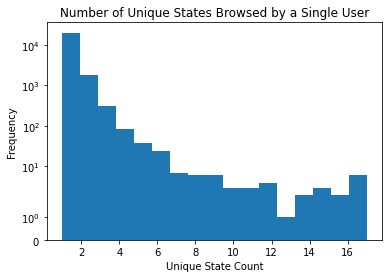

In [ ]:
merge_df2['state'] = merge_df2['state'].fillna("NAN")
group = merge_df2.groupby(by=['ip']).agg(unique_state_ct=('state', lambda x: len(np.unique(x))))
display(group.head(2))

# plot unique state count per ip address
plt.hist(group.unique_state_ct, bins=max(group.unique_state_ct))
plt.yscale("symlog")
plt.xlabel("Unique State Count")
plt.ylabel("Frequency")
plt.title('Number of Unique States Browsed by a Single User')
plt.show()

In [ ]:
thresholds = np.arange(2, 10)
pass_pcts = []

for threshold in thresholds: 
  suspicious_ip_ls = group.loc[group.unique_state_ct<=threshold].index.values
  ori_rows = merge_df2.shape[0]

  new_df = merge_df2.loc[merge_df2.ip.isin(suspicious_ip_ls)]
  new_rows = new_df.shape[0]
  pct = round(100*new_rows/ori_rows,2)
  pass_pcts.append(pct)

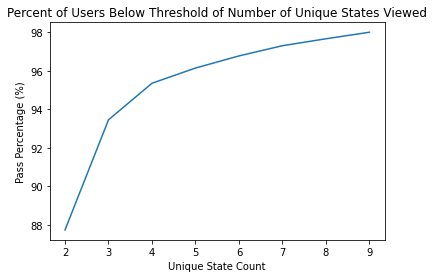

In [ ]:
plt.plot(thresholds, pass_pcts)
plt.xlabel("Unique State Count")
plt.ylabel("Pass Percentage (%)")
plt.title('Percent of Users Below Threshold of Number of Unique States Viewed')
plt.show()

We assume that for an ip address (a user) will look for houses in <= 3 states.

In [ ]:
threshold = 3
suspicious_ip_ls = group.loc[group.unique_state_ct<=threshold].index.values
ori_rows = merge_df2.shape[0]

new_df = merge_df2.loc[merge_df2.ip.isin(suspicious_ip_ls)]
new_rows = new_df.shape[0]
pct = round(100*new_rows/ori_rows,2)

print(f"===== threshold: {threshold}")
print("Origin merged data: ", ori_rows)
print("New data: ", new_rows)
print(f"{pct} % pass the filter\n")

===== threshold: 3
Origin merged data:  845579
New data:  790268
93.46 % pass the filter



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,unique_county_ct
ip,
1.128.108.49,1
1.39.31.35,2


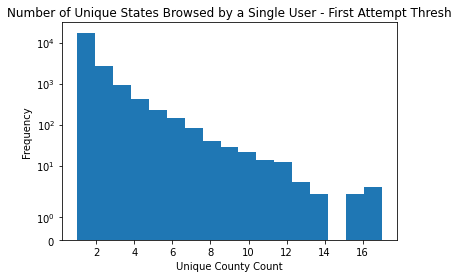

In [ ]:
new_df['county'] = new_df['county'].fillna("NAN")
group = new_df.groupby(by=['ip']).agg(unique_county_ct=('county', lambda x: len(np.unique(x))))
display(group.head(2))

# plot unique state count per ip address
plt.hist(group.unique_county_ct, bins=max(group.unique_county_ct))
plt.yscale("symlog")
plt.xlabel("Unique County Count")
plt.ylabel("Frequency")
plt.title('Number of Unique States Browsed by a Single User - First Attempt Thresh')
plt.show()

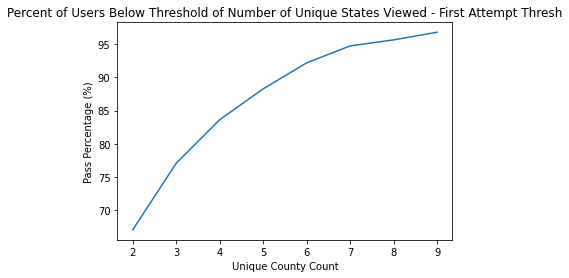

In [ ]:
thresholds = np.arange(2, 10)
pass_pcts = []

for threshold in thresholds: 
  suspicious_ip_ls = group.loc[group.unique_county_ct<=threshold].index.values
  ori_rows = new_df.shape[0]

  new_df2 = new_df.loc[new_df.ip.isin(suspicious_ip_ls)]
  new_rows = new_df2.shape[0]
  pct = round(100*new_rows/ori_rows,2)
  pass_pcts.append(pct)

# plot trade-off between unique county threshold and the pass %
plt.plot(thresholds, pass_pcts)
plt.xlabel("Unique County Count")
plt.ylabel("Pass Percentage (%)")
plt.title('Percent of Users Below Threshold of Number of Unique States Viewed - First Attempt Thresh')
plt.show()

We assume that for an ip address (a user) will look for houses in <= 6 counties.

In [ ]:
threshold = 6
suspicious_ip_ls = group.loc[group.unique_county_ct<=threshold].index.values
ori_rows = new_df.shape[0]

new_df2 = new_df.loc[new_df.ip.isin(suspicious_ip_ls)]
new_rows = new_df2.shape[0]
pct = round(100*new_rows/ori_rows,2)

print(f"===== threshold: {threshold}")
print("Origin merged data: ", ori_rows)
print("New data: ", new_rows)
print(f"{pct} % new_df pass the filter\n")

===== threshold: 6
Origin merged data:  790268
New data:  728199
92.15 % new_df pass the filter



In [ ]:
new_df2.to_csv("merged_user_data_rm_suspicious.csv", index=False)